# Q 7

#### Importing necessary files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load and read file data

In [2]:
df = pd.read_csv("C:/Users/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### E D A

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

#### How many rows does the dataset have?

In [6]:
num_rows = len(df)
print(num_rows)

1338


#### How many columns does the dataset have?

In [7]:
num_cols = len(df.columns)
print(num_cols)

7


#### What are the column titles of the input variables?

In [8]:
input_cols = list(df.columns)[:-1]
input_cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

#### What are the column titles of target variable(s)?

In [9]:
Target_Col = [df.columns.tolist()[-1]]
Target_Col

['charges']

#### What is the minimum, maximum and average value of the charges column?

Minimum Value of Charge: 1121.8739
Maximum Value of Charge: 63770.42801
Mean Value of Charge: 13270.422265141257


<AxesSubplot:title={'center':'Charges'}, xlabel='charges', ylabel='Density'>

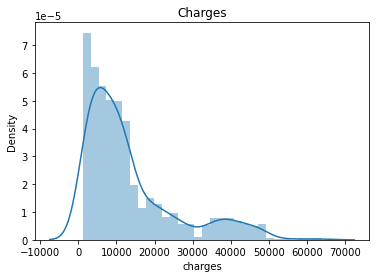

In [10]:
print(f"Minimum Value of Charge: {df.charges.min()}")
print(f"Maximum Value of Charge: {df.charges.max()}")
print(f"Mean Value of Charge: {df.charges.mean()}")
import warnings
warnings.filterwarnings("ignore")

plt.title("Charges")
sns.distplot(df.charges)

#### Age distribution visualization

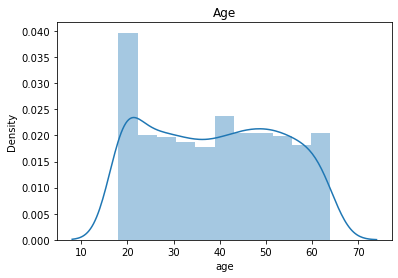

In [11]:
plt.title("Age")
sns.distplot(df.age)
import warnings
warnings.filterwarnings("ignore")

#### Isolating columns

In [12]:
numerical_continuos = df.select_dtypes('float64').columns.tolist()
numerical_continuos

['bmi', 'charges']

In [13]:
numerical_discrete = df.select_dtypes('int64').columns.tolist()
numerical_discrete

['age', 'children']

#### Identifying outliers in numerical columns

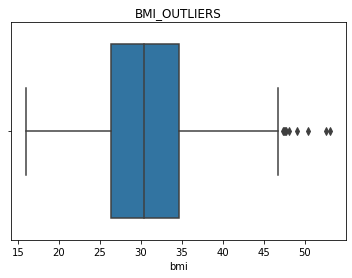

In [14]:
plt.title('BMI_OUTLIERS')
sns.boxplot(df.bmi)
import warnings
warnings.filterwarnings("ignore")


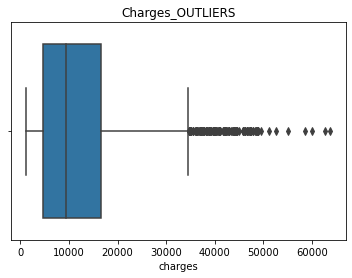

In [15]:
plt.title('Charges_OUTLIERS')
sns.boxplot(df.charges)
import warnings
warnings.filterwarnings("ignore")


#### Resolving outliers using a zscore test and a threshold

In [16]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [17]:
df.bmi.mean()

30.663396860986538

In [18]:
upper = df.bmi.mean() + 1*df.bmi.std()

lower = df.bmi.mean() - 1*df.bmi.std()

print(upper)

print(lower)

36.76158377266555
24.565209949307523


In [19]:
new_df= df[(df.bmi<upper) & (df.bmi>lower)]

new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216


In [20]:
df['zscore'] = ( df.bmi - df.bmi.mean() ) / df.bmi.std()
df.head(5)

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447


In [21]:
df[df['zscore']>1]


df[df['zscore']<-1]

,age,sex,bmi,children,smoker,region,charges,zscore
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
17,23,male,23.845,0,no,northeast,2395.17155,-1.118102
26,63,female,23.085,0,no,northeast,14451.83515,-1.242730
28,23,male,17.385,1,no,northwest,2775.19215,-2.177434
35,19,male,20.425,0,no,northwest,1625.43375,-1.678925
...,...,...,...,...,...,...,...,...
1302,25,female,20.800,1,no,southwest,3208.78700,-1.617431
1306,29,female,21.850,0,yes,northeast,16115.30450,-1.445249
1314,30,female,23.655,3,yes,northwest,18765.87545,-1.149259
1316,19,female,20.600,0,no,southwest,1731.67700,-1.650228


In [22]:
df_new = df[(df.zscore>-1) & (df.zscore<1)]

In [23]:
df_new

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.90,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.77,1,no,southeast,1725.55230,0.509431
2,28,male,33.00,3,no,southeast,4449.46200,0.383164
4,32,male,28.88,0,no,northwest,3866.85520,-0.292447
5,31,female,25.74,0,no,southeast,3756.62160,-0.807354
...,...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733,0.448757
1333,50,male,30.97,3,no,northwest,10600.54830,0.050278
1334,18,female,31.92,0,no,northeast,2205.98080,0.206062
1336,21,female,25.80,0,no,southwest,2007.94500,-0.797515


#### Validating the analysis was successful

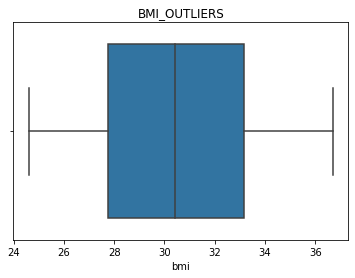

In [24]:
plt.title('BMI_OUTLIERS')
sns.boxplot(df_new.bmi)
import warnings
warnings.filterwarnings("ignore")

In [25]:
df.charges.mean()

13270.422265141257

In [26]:
upper = df.charges.mean() + 1*df.charges.std()

lower = df.charges.mean() - 1*df.charges.std()

print(upper)

print(lower)

25380.43350183525
1160.4110284472627


In [27]:
new_df1= df[(df.charges<upper) & (df.charges>lower)]

new_df1.head()

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447


In [28]:
df['zscore'] = ( df.charges - df.charges.mean() ) / df.charges.std()
df.head(5)

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,0.298472
1,18,male,33.770,1,no,southeast,1725.55230,-0.953333
2,28,male,33.000,3,no,southeast,4449.46200,-0.728402
3,33,male,22.705,0,no,northwest,21984.47061,0.719574
4,32,male,28.880,0,no,northwest,3866.85520,-0.776512


In [29]:
df[df['zscore']>1]


df[df['zscore']<-1]

,age,sex,bmi,children,smoker,region,charges,zscore
22,18,male,34.10,0,no,southeast,1137.0110,-1.001932
194,18,male,34.43,0,no,southeast,1137.4697,-1.001894
442,18,male,43.01,0,no,southeast,1149.3959,-1.000910
663,18,male,33.66,0,no,southeast,1136.3994,-1.001983
781,18,male,41.14,0,no,southeast,1146.7966,-1.001124
808,18,male,30.14,0,no,southeast,1131.5066,-1.002387
866,18,male,37.29,0,no,southeast,1141.4451,-1.001566
940,18,male,23.21,0,no,southeast,1121.8739,-1.003182
1244,18,male,33.33,0,no,southeast,1135.9407,-1.002021


In [30]:
df_new1 = df[(df.zscore>-1) & (df.zscore<1)]

In [31]:
new_df1

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,2.301767
1333,50,male,30.970,3,no,northwest,10600.54830,0.050278
1334,18,female,31.920,0,no,northeast,2205.98080,0.206062
1335,18,female,36.850,0,no,southeast,1629.83350,1.014499


#### Validating Charges variable for presence of outliers

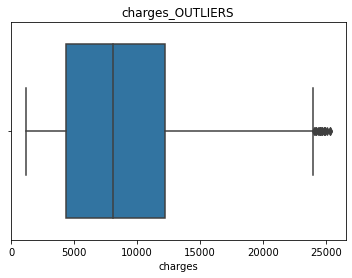

In [32]:
plt.title('charges_OUTLIERS')
sns.boxplot(new_df1.charges)
import warnings
warnings.filterwarnings("ignore")

#### Isolating categorical columns

In [33]:
categorical = df.select_dtypes('object').columns.tolist()
categorical

['sex', 'smoker', 'region']

Text(0.5, 0, 'dependent_count')

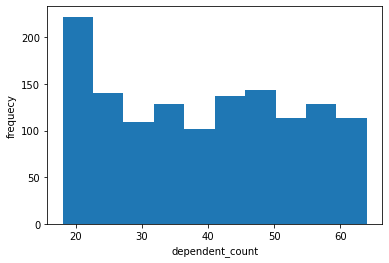

In [34]:
age = df['age'].plot.hist()
age.set_ylabel("frequecy")
age.set_xlabel("dependent_count")

Text(0.5, 0, 'dependent_count')

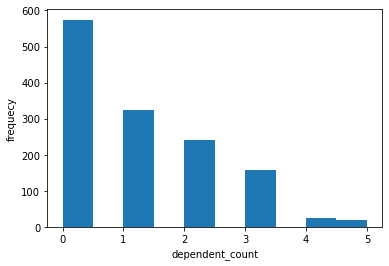

In [35]:
children = df['children'].plot.hist()
children.set_ylabel("frequecy")
children.set_xlabel("dependent_count")

In [36]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [37]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [38]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Encoding categorical variables

In [39]:
df.loc[df['sex']=='male','sex']=0
df.loc[df['sex']=='female','sex']=1

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,1,27.900,0,yes,southwest,16884.92400,0.298472
1,18,0,33.770,1,no,southeast,1725.55230,-0.953333
2,28,0,33.000,3,no,southeast,4449.46200,-0.728402
3,33,0,22.705,0,no,northwest,21984.47061,0.719574
4,32,0,28.880,0,no,northwest,3866.85520,-0.776512


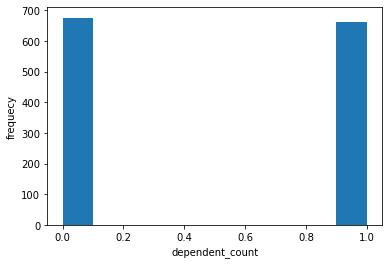

In [41]:
children = df['sex'].plot.hist()
children.set_ylabel("frequecy")
children.set_xlabel("dependent_count")
import warnings
warnings.filterwarnings("ignore")

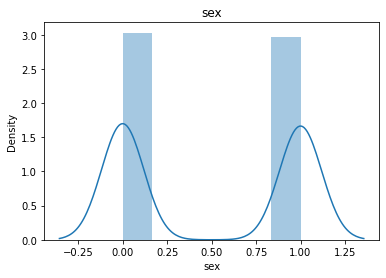

In [42]:
plt.title("sex")
sns.distplot(df.sex)
import warnings
warnings.filterwarnings("ignore")

In [43]:
df.loc[df['smoker']=='yes','smoker']=0
df.loc[df['smoker']=='no','smoker']=1

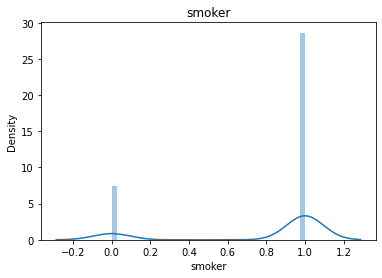

In [44]:
plt.title("smoker")
sns.distplot(df.smoker)
import warnings
warnings.filterwarnings("ignore")

In [45]:
df.loc[df['region']=='southeast','region']=0
df.loc[df['region']=='southwest','region']=1
df.loc[df['region']=='northeast','region']=2
df.loc[df['region']=='northwest','region']=3



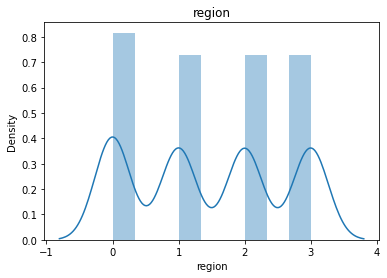

In [46]:
plt.title("region")
sns.distplot(df.region)
import warnings
warnings.filterwarnings("ignore")

# Q 8

#### Converting the target labels to their respective log values 
#### Two reasons why this step may be useful as we train the machine learning model
#### 1. Makes our training data more useful and expressive, and it can be rescaled easily
#### 2. By using numeric values, we more easily determine a probability for our values

In [47]:
df

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,1,27.900,0,0,1,16884.92400,0.298472
1,18,0,33.770,1,1,0,1725.55230,-0.953333
2,28,0,33.000,3,1,0,4449.46200,-0.728402
3,33,0,22.705,0,1,3,21984.47061,0.719574
4,32,0,28.880,0,1,3,3866.85520,-0.776512
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830,-0.220468
1334,18,1,31.920,0,1,2,2205.98080,-0.913661
1335,18,1,36.850,0,1,0,1629.83350,-0.961237
1336,21,1,25.800,0,1,1,2007.94500,-0.930014


In [48]:
df.corr()

,age,bmi,children,charges,zscore
age,1.000000,0.109272,0.042469,0.299008,0.299008
bmi,0.109272,1.000000,0.012759,0.198341,0.198341
children,0.042469,0.012759,1.000000,0.067998,0.067998
charges,0.299008,0.198341,0.067998,1.000000,1.000000
zscore,0.299008,0.198341,0.067998,1.000000,1.000000


<AxesSubplot:>

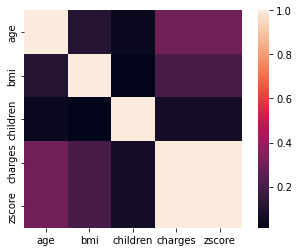

In [49]:
sns.heatmap(df.corr(), square = True)

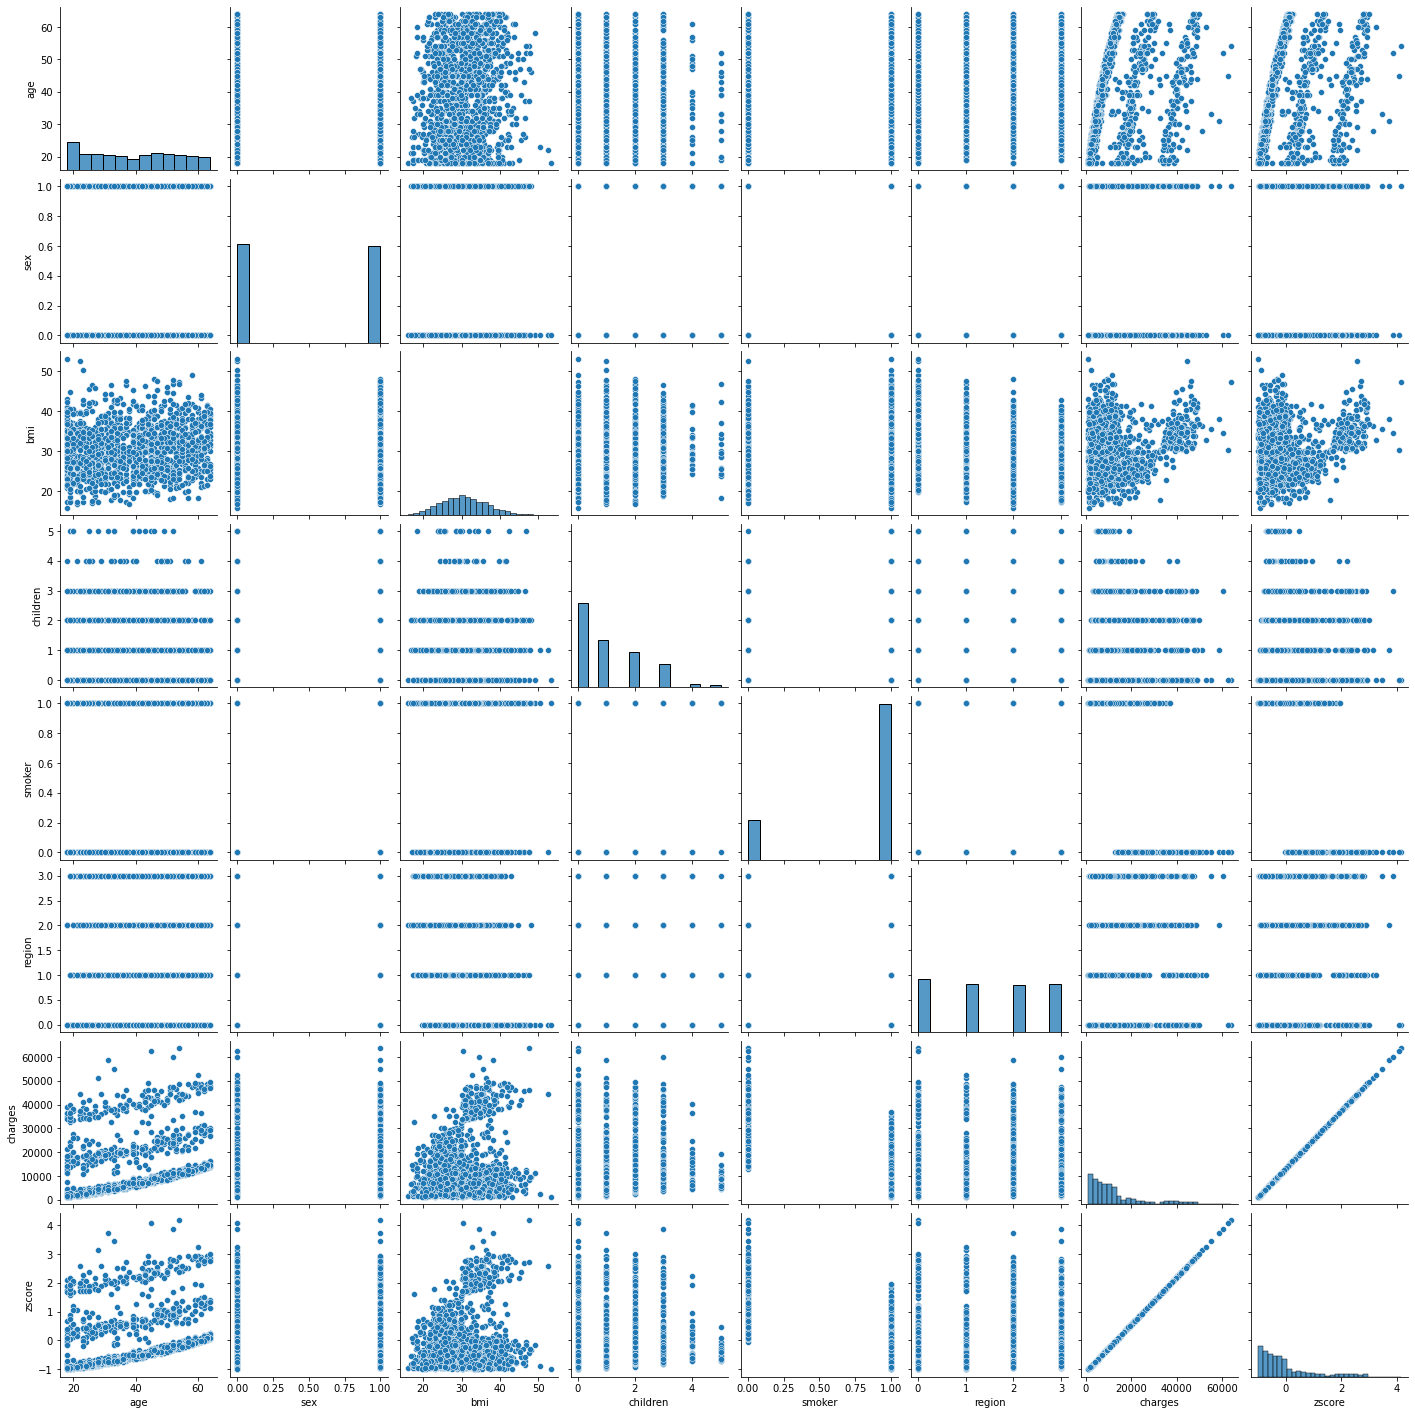

In [50]:
sns.pairplot(df)

#### Slice the selected feature columns and the labels into the training and testing set

In [52]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [55]:
X = df.drop(['age','sex', 'children', 'smoker', 'bmi', 'region'],axis=1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Normalizing data

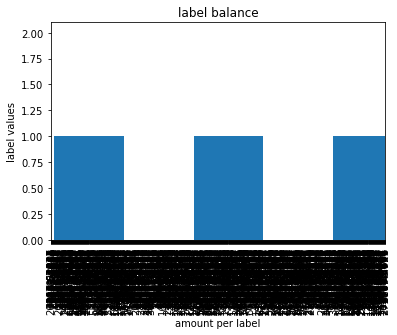

In [63]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('amount per label')
plt.ylabel('label values')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression().fit(X, y)

In [67]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 1.0
intercept: 9.048897481989115e-05
coefficients: [9.99999993e-01 8.25763060e-05]


In [70]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
